Importing packages

In [ ]:
import pandas as pd                #used for data analysis and importing files from various formats
import numpy as np                 #for performing mathematical operations on multidimensional arrays

import seaborn as sns              #used for data visualization & exploratory data analysis
import matplotlib.pyplot as plt    #for data visualization


import warnings                    #to suppress the warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder  #for converting categorical data into numerical data


Importing the dataset 


In [ ]:
loan = pd.read_csv("train_ctrUa4K.csv")    #importing the train dataset
loan.head(5)                               #to get the first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking the datatype of each column

In [ ]:
loan.info()                      #printing information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the above information we can observe that our data is divided into categorical and numerical features:

1. Categorical features are-

*   Loan_ID
*   Gender
*   Married
*   Dependents
*   Education
*   Self_Employed
*   Property Area
*   Loan_Status

2. Numerical features are-

*   ApplicantIncome    
*   CoapplicantIncome
*   LoanAmount 
*   Loan_Amount_Term
*   Credit_History 




 








Now we will look into relationships between different variables:

1. Univariate plots:
These plots are based on a single variable and show the frequency of uniques values of a given variable.

2. Bivariate plots:
This type of plots is used when you need to find a relation between two variables and to find how the value of one variable changes the value of another variable. 

Below are some example of univariate plots:

In [ ]:
def title(title,fontsize=15):                                 #creating function to display the heading
    plt.title(title,fontweight='bold',fontsize=fontsize)

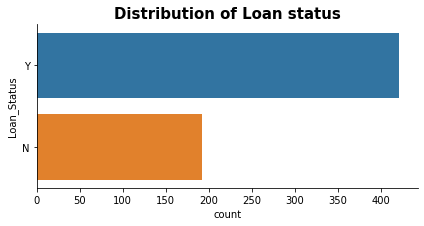

In [ ]:
sns.catplot(data=loan,y='Loan_Status',kind='count',height=3,aspect=2)    #plotting the count of loan status
title('Distribution of Loan status')

From the above graph, we can infer that more than 400 number of loans were
granted and almost 200 loans were not granted.

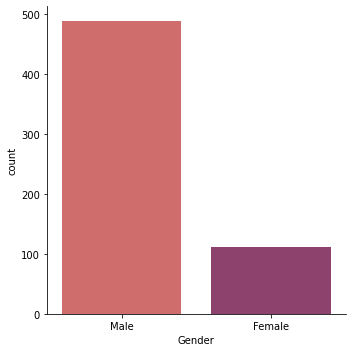

In [ ]:
sns.catplot(x="Gender", kind="count", palette="flare", data=loan)    #plotting the count of males and females in our dataset

From the above graph we can observe that more male population applied for loan than females.

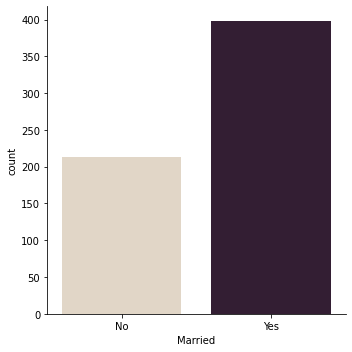

In [ ]:
sns.catplot(x="Married", kind="count", palette="ch:.25", data=loan)    #plotting the count of married population in our data

We can infer that most of the population that applied for loan fall under married population.

Now, we will look into some bivariate & multivariate plots that examines the relationship between two or more variables:

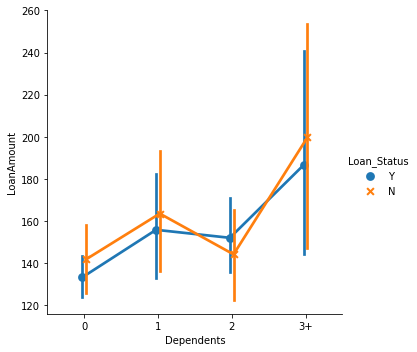

In [ ]:
sns.catplot(x="Dependents", y="LoanAmount", kind="point", hue="Loan_Status",data=loan,dodge=True,markers=["o", "x"])      #plotting point graph using seaborn library


From the above graph we can infer that people with more no. of dependents required more loan amount and hence, got approved the highest. 

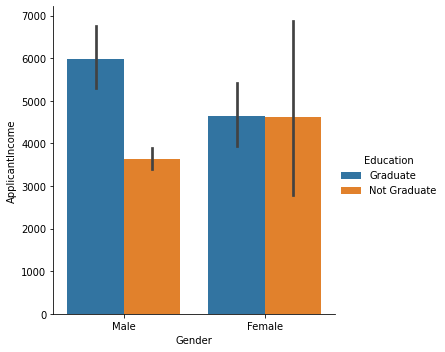

In [ ]:
sns.catplot(x="Gender", y="ApplicantIncome", hue="Education", kind="bar", data=loan)   #plotting the graph between applicant income, gender & education

Here, we can observe that graduate males have highest income from the general population bracket.

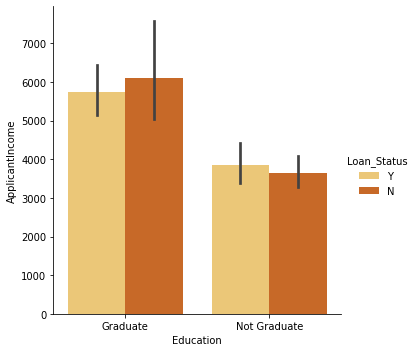

In [ ]:
sns.catplot(x="Education", y="ApplicantIncome", hue="Loan_Status", kind="bar", \     #plotting the graph between income, education & loan status
            data=loan,  palette="YlOrBr")

Graduates have more income, hence they have more chances of getting their loans approved in comparison to non graduates.

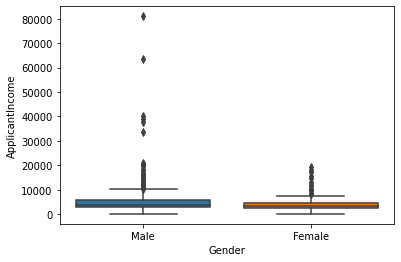

In [ ]:
sns.boxplot(x='Gender',y='ApplicantIncome', data=loan, width=0.8)                #plotting graph between gender & applicant income
plt.show()

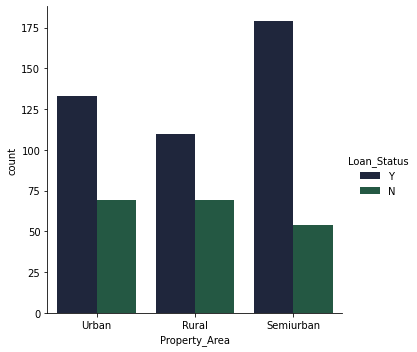

In [ ]:
sns.color_palette("ch:2,r=.2,l=.6")
sns.catplot(x="Property_Area", hue="Loan_Status", kind="count", data=loan)       #plotting graph between property area & loan status


Most of the applicants are from semiurban area.

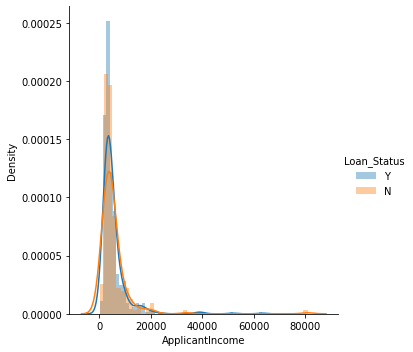

In [ ]:
sns.FacetGrid(loan, hue="Loan_Status", size=5) \
   .map(sns.distplot, "ApplicantIncome") \                                       #plotting graph between applicant income and loan status
   .add_legend();
plt.show();


Most of the applicants that have applied for loan have income upto 2 lakhs.

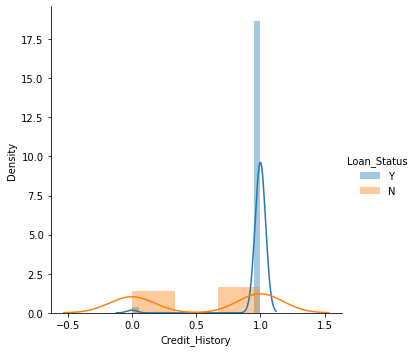

In [ ]:
sns.FacetGrid(loan, hue="Loan_Status", size=5) \
   .map(sns.distplot, "Credit_History") \                                        #plotting graph between credit history & loan status
   .add_legend();
plt.show();

Applicants with good credit history had most no. of loans approved.

In [ ]:
loan.shape                                                                      # checking the dimensions of our dataframe

(614, 13)

Our data has 614 rows and 13 columns

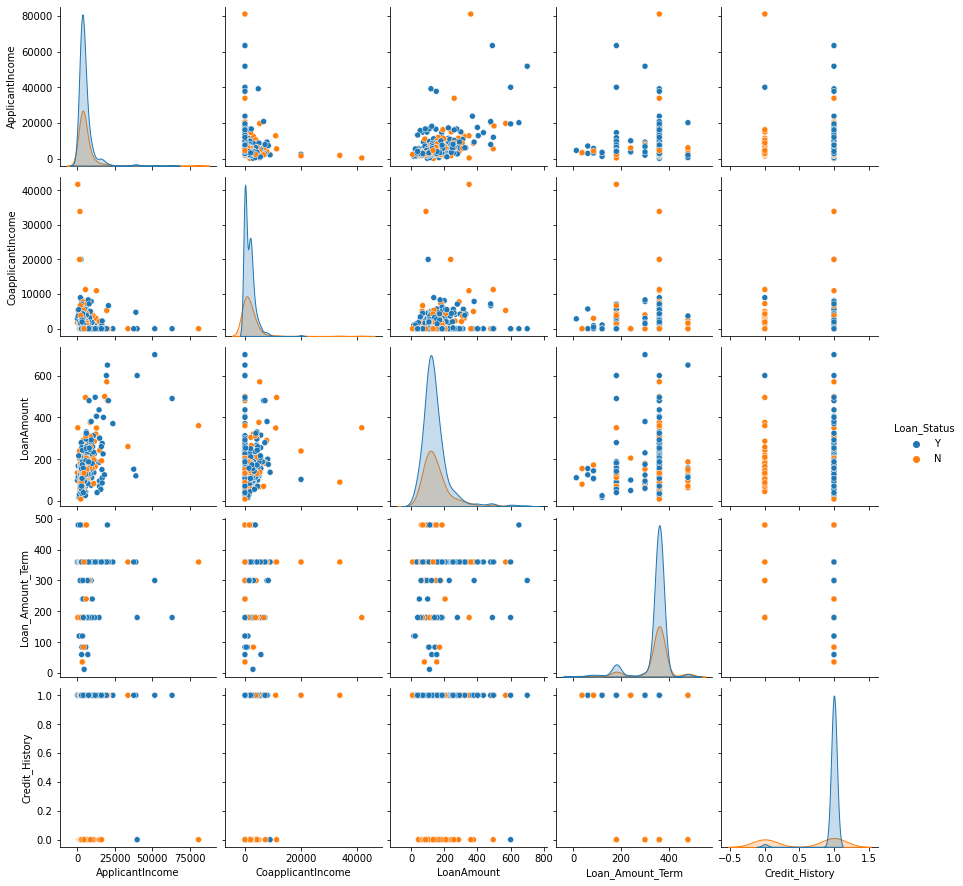

In [ ]:
sns.pairplot(loan,hue="Loan_Status")                                            # pairplot visualization
plt.show()

From the pairplot we can infer that the applicants with high income, loan amount, coapplicant income and good credit history are eligible for getting their loans approved.

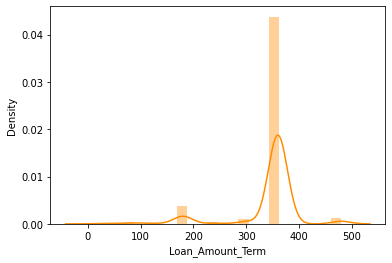

In [ ]:
sns.distplot(loan["Loan_Amount_Term"],color='darkorange') 


Most of the applicants applied for loans in approx 350 months of term period.

Now, we will work towards pre-processing our data

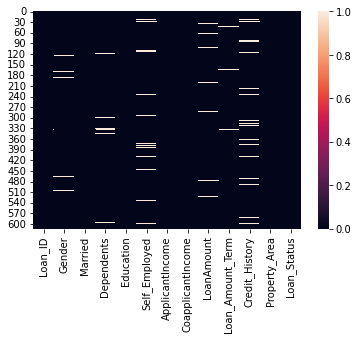

In [ ]:
sns.heatmap(loan.isnull())                                                      # plotting the heatmap to visualize null values

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']   #converting categorical data into numerical data
le = LabelEncoder()
for i in categorical:
    loan[i] = le.fit_transform(loan[i])
loan.head() 




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
loan.isnull().sum()                                                             # displays all the no. of null values

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", loan.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",loan.nunique())


Missing values :   86

Unique values :  
 Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


In [ ]:
loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


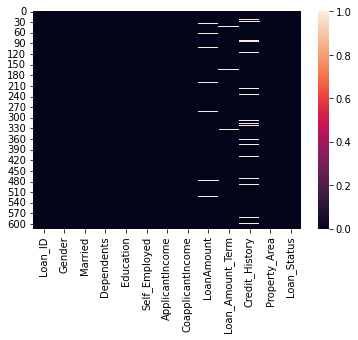

In [ ]:
sns.heatmap(loan.isnull())                                                      # visualizing missing values via heatmap

In [ ]:
loan.Loan_Status.value_counts()                                                 # counting values of loan status approved or not

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
loan.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Missing value treatment by imputing them with median

In [ ]:
loan['LoanAmount'].fillna(loan['LoanAmount'].median(),inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median(),inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].median(),inplace=True)
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
loan.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

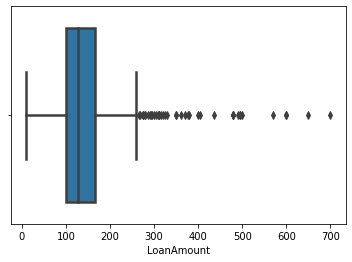

In [ ]:
sns.boxplot(x='LoanAmount', data=loan, linewidth=2.5)                           # visualization of loan amount through boxplot
plt.show()

50% of the applicants have applied for loan in the range between 10-20 lakhs. Here, we can also observe some outliers in the data as well.

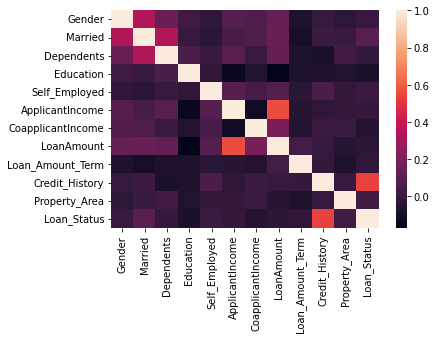

In [ ]:
dataplot=sns.heatmap(loan.corr())                                               # correlation visualization via heatmap
dataplot


The most correlated variables are Loan Amount and Applicant Income & credit history and loan status.